In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

The MediaPipe Face Landmarker task requires a trained model that is compatible with this task.

In [2]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def draw_landmarks_on_image(rgb_image, detection_result):
    face_landmarks_list = detection_result.face_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected faces to visualize.
    for idx in range(len(face_landmarks_list)):
        face_landmarks = face_landmarks_list[idx]

        # Draw the face landmarks.
        face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        face_landmarks_proto.landmark.extend(
            [
                landmark_pb2.NormalizedLandmark(
                    x=landmark.x, y=landmark.y, z=landmark.z
                )
                for landmark in face_landmarks
            ]
        )

        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style(),
        )
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles.get_default_face_mesh_contours_style(),
        )
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles.get_default_face_mesh_iris_connections_style(),
        )

    return annotated_image

In [4]:
def plot_face_blendshapes_bar_graph(face_blendshapes):
    # Extract the face blendshapes category names and scores.
    face_blendshapes_names = [
        face_blendshapes_category.category_name
        for face_blendshapes_category in face_blendshapes
    ]
    face_blendshapes_scores = [
        face_blendshapes_category.score
        for face_blendshapes_category in face_blendshapes
    ]
    # The blendshapes are ordered in decreasing score value.
    face_blendshapes_ranks = range(len(face_blendshapes_names))

    fig, ax = plt.subplots(figsize=(12, 12))
    bar = ax.barh(
        face_blendshapes_ranks,
        face_blendshapes_scores,
        label=[str(x) for x in face_blendshapes_ranks],
    )
    ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
    ax.invert_yaxis()

    # Label each bar with values
    for score, patch in zip(face_blendshapes_scores, bar.patches):
        plt.text(
            patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top"
        )

    ax.set_xlabel("Score")
    ax.set_title("Face Blendshapes")
    plt.tight_layout()
    plt.show()

In [10]:
import cv2
from IPython.display import display, Image
import numpy as np
import cv2

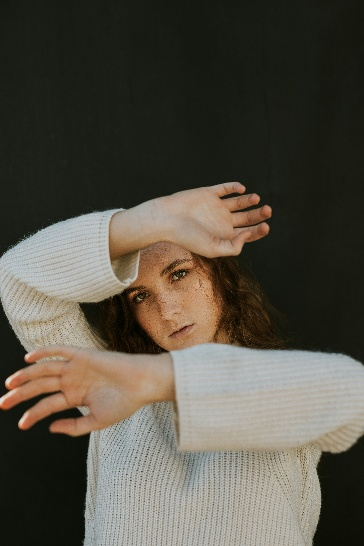

In [16]:
# Read the image
img = cv2.imread("images/image.jpg")

# Check if the image was loaded properly
if img is None:
    print("Failed to load the image. Check the file path and file.")
else:
    # Set the desired width (e.g., half the original width)
    desired_width = int(img.shape[1] * 0.1)
    
    # Calculate the aspect ratio
    aspect_ratio = img.shape[1] / img.shape[0]
    
    # Calculate the new height to maintain the aspect ratio
    desired_height = int(desired_width / aspect_ratio)
    
    # Resize the image
    resized_img = cv2.resize(img, (desired_width, desired_height))
    
    # Convert the resized image to JPEG format
    _, img_jpeg = cv2.imencode('.jpg', resized_img)

    # Display the image
    display(Image(data=img_jpeg.tobytes()))

In [17]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [19]:
# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='model/face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

In [20]:
# STEP 3: Load the input image.
image = mp.Image.create_from_file("images/image.jpg")

In [21]:
# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

In [ ]:
# Process the detection result and visualize it


# Convert the annotated image from RGB to BGR


# Convert the image to JPEG format for displaying in Jupyter notebook


# Display the image


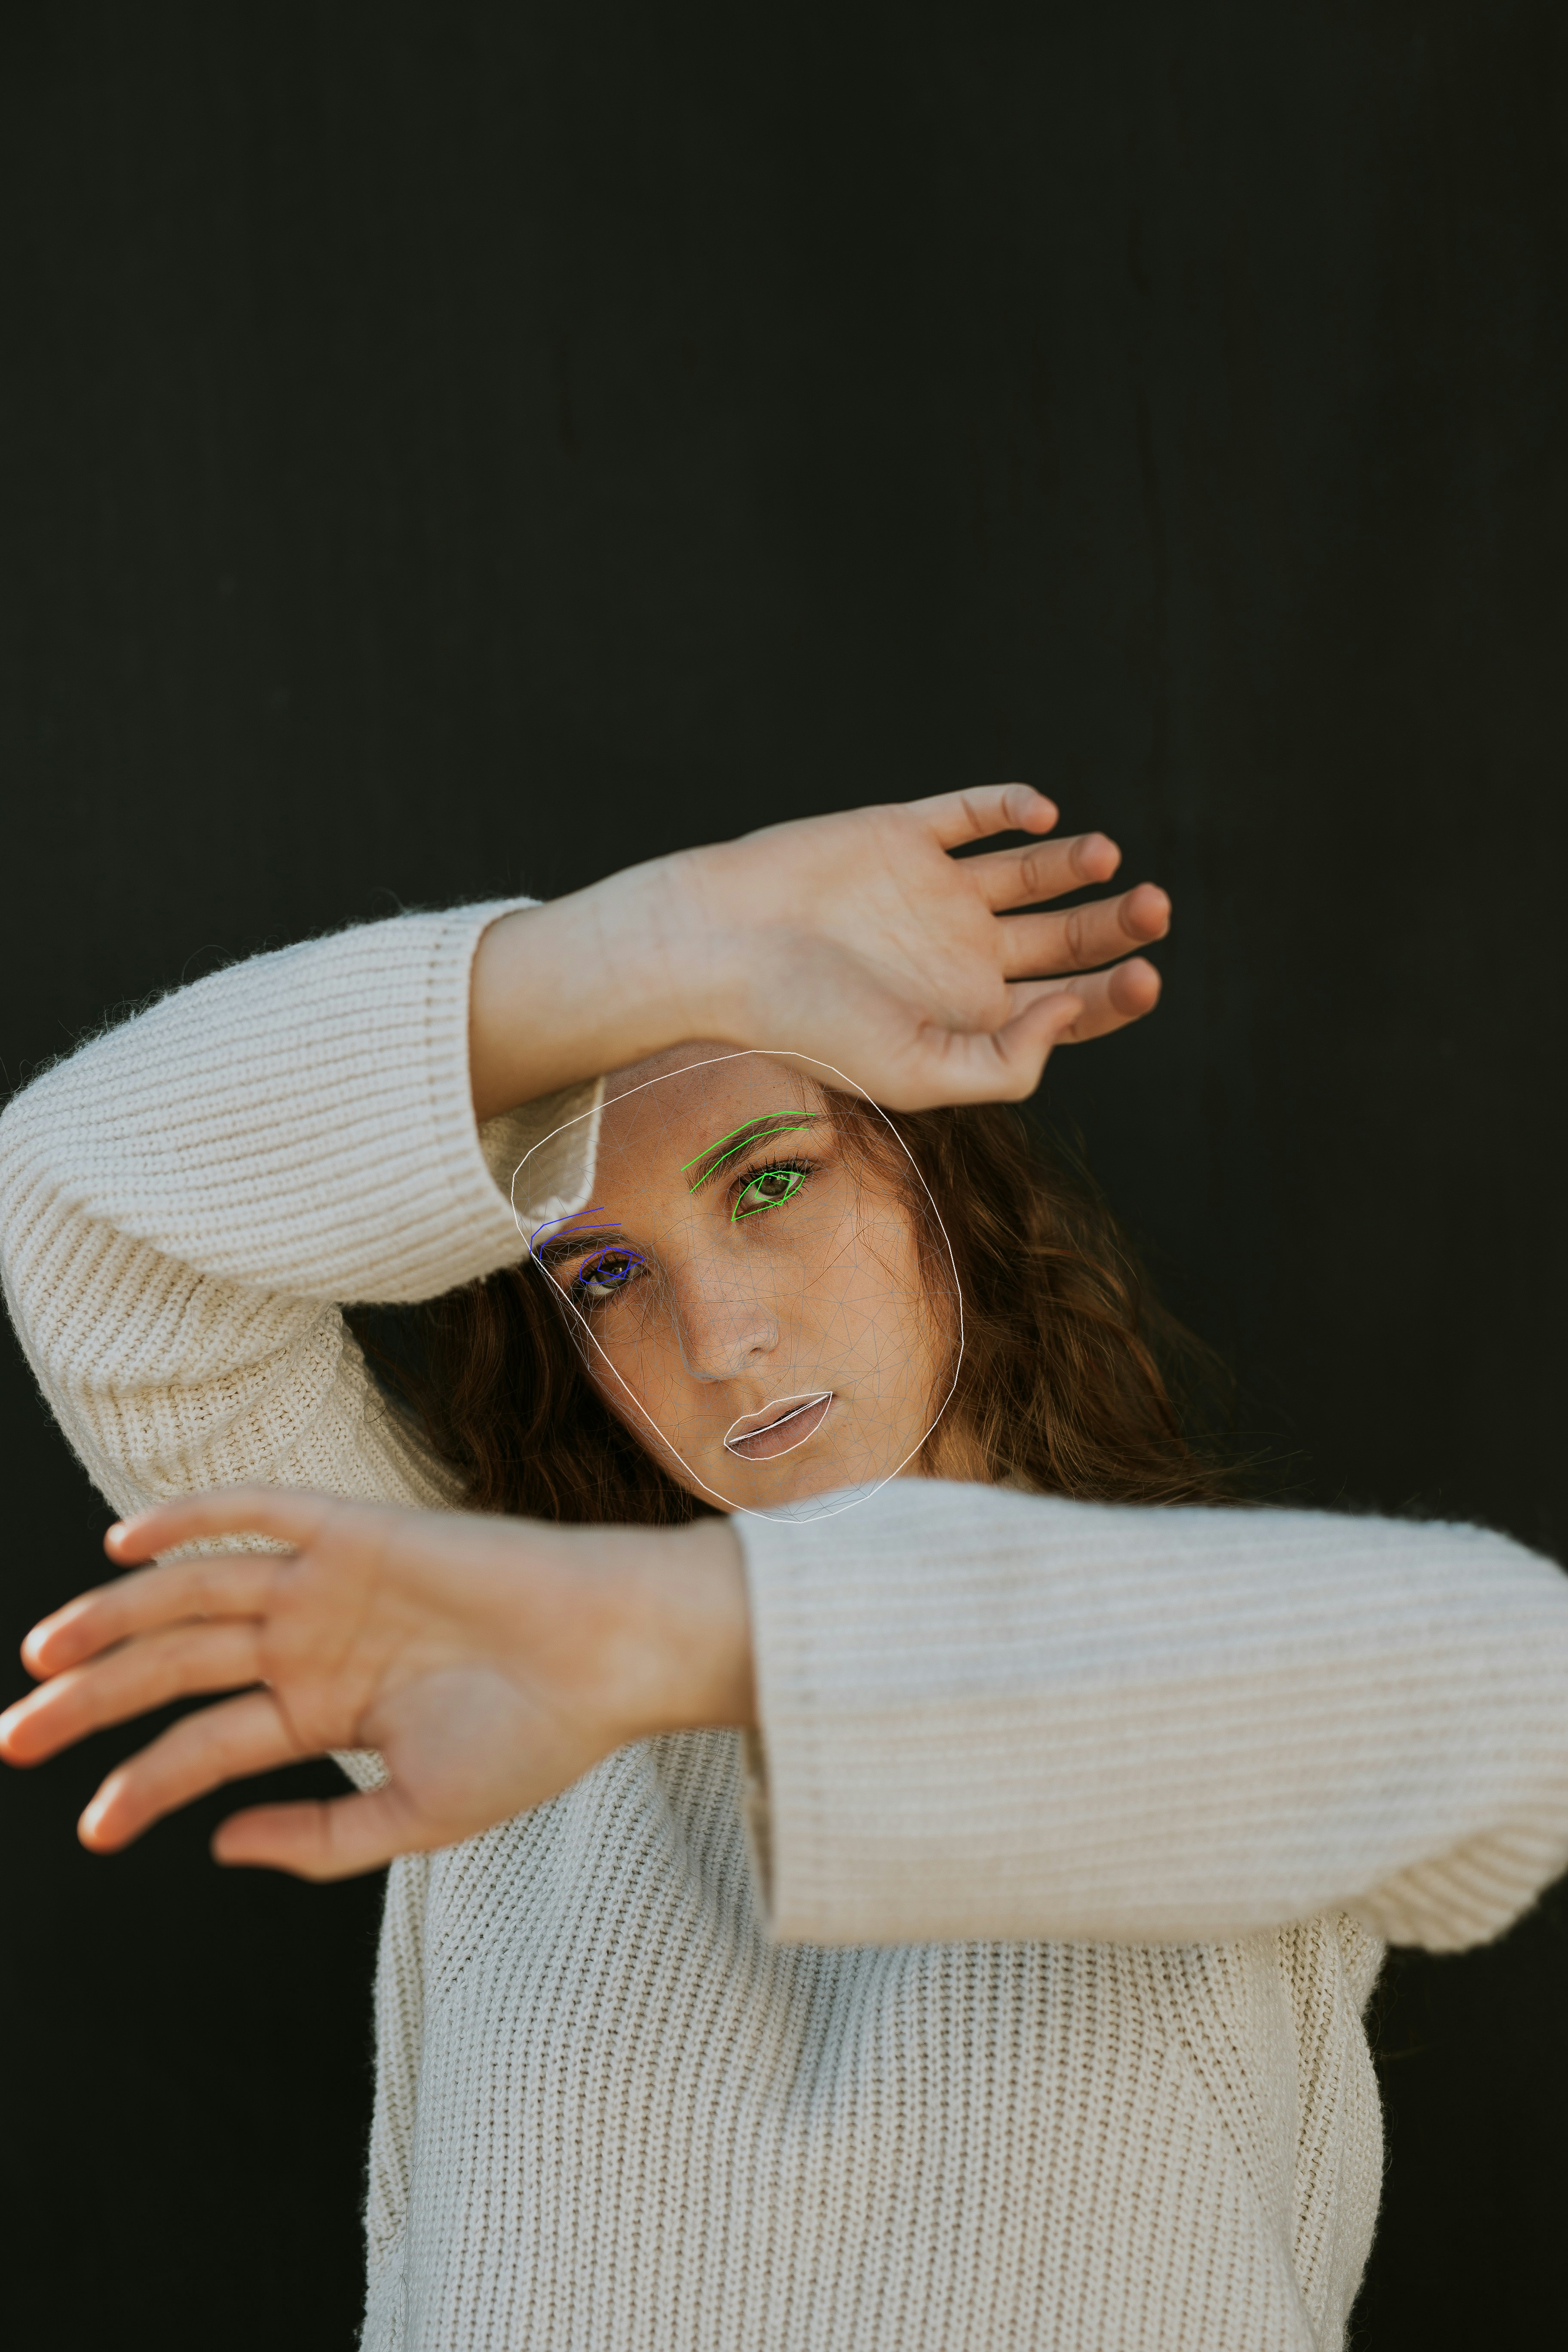

In [23]:
# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
_, buffer = cv2.imencode('.jpg', annotated_image_bgr)
display(Image(data=buffer.tobytes()))

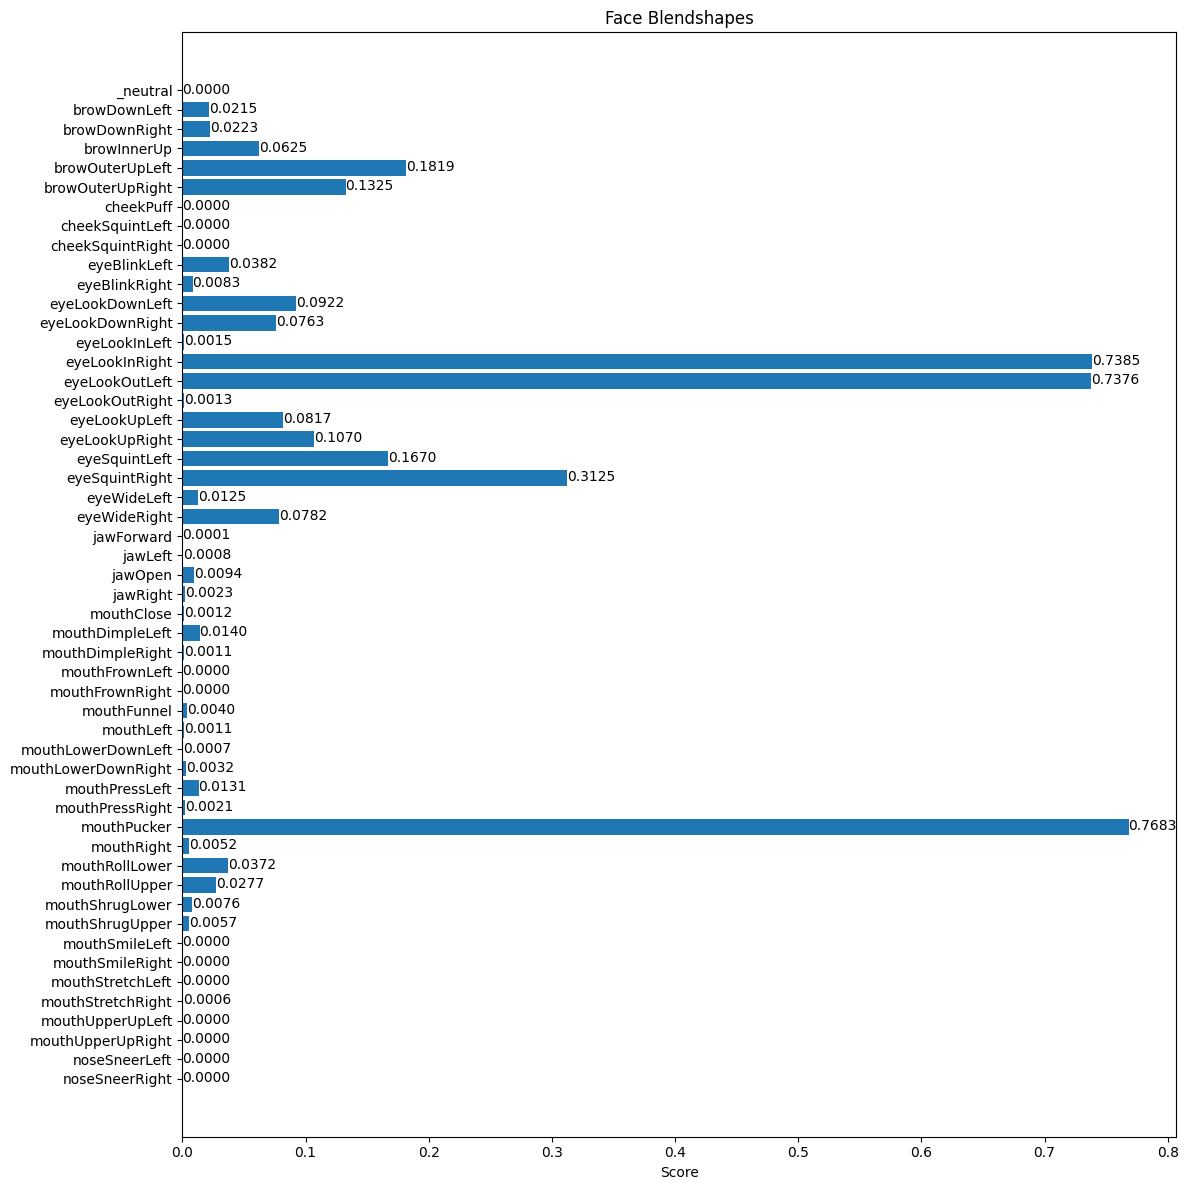

In [24]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [25]:
print(detection_result.facial_transformation_matrixes)

[array([[  0.86061758,  -0.46441907,  -0.20892891,  -1.39765429],
       [  0.41785237,   0.87850481,  -0.23157722,  -3.69943547],
       [  0.29109401,   0.11199804,   0.95011592, -72.04997253],
       [  0.        ,   0.        ,   0.        ,   1.        ]])]
